# Importing librarires

In [71]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder,OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

# XGBoost
from xgboost import XGBClassifier

# LightGBM
from lightgbm import LGBMClassifier

# CatBoost
from catboost import CatBoostClassifier

# Neural Networks
from sklearn.neural_network import MLPClassifier

In [72]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# EDA

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [74]:
train_df.isnull().sum().sort_values(ascending=False)

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [75]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [76]:
train_df['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [77]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


# Plotting histogram

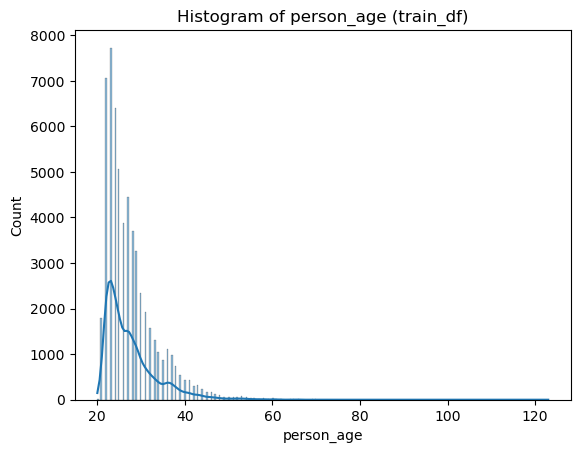

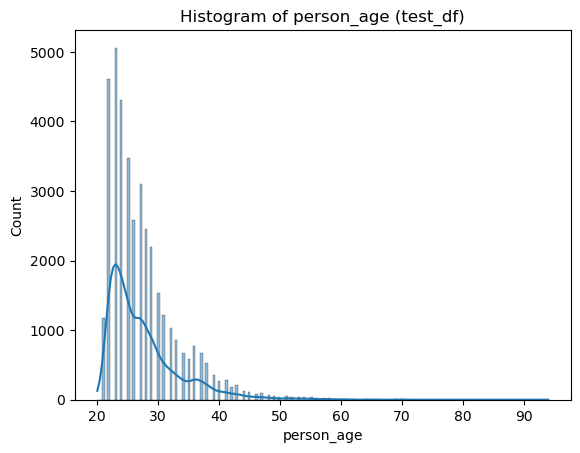

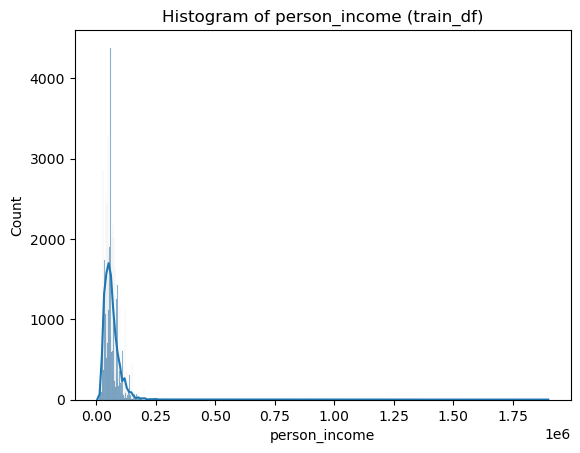

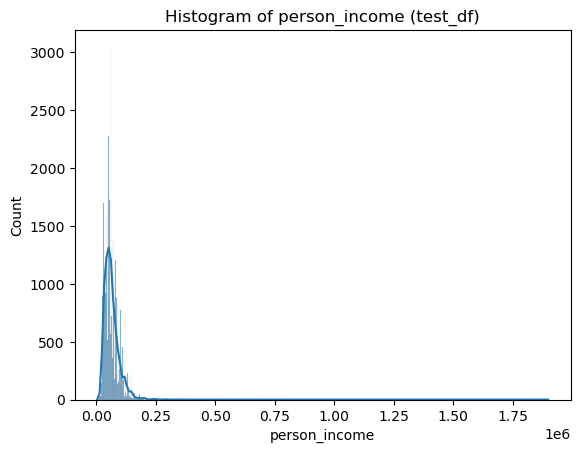

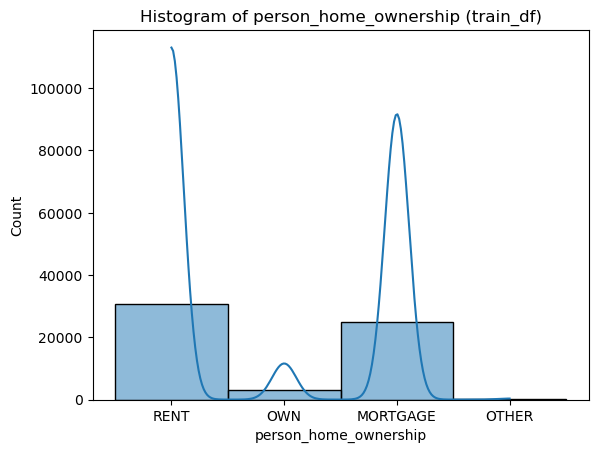

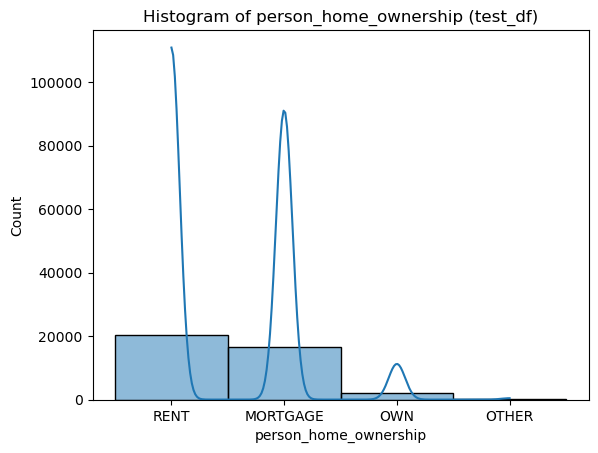

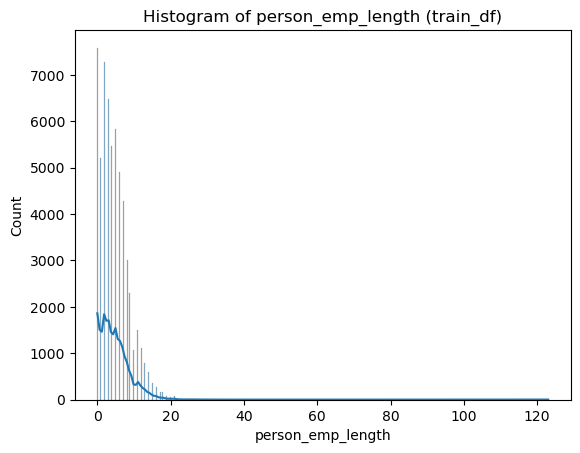

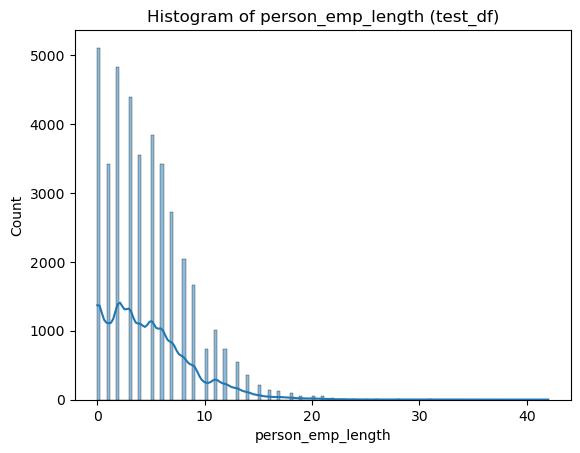

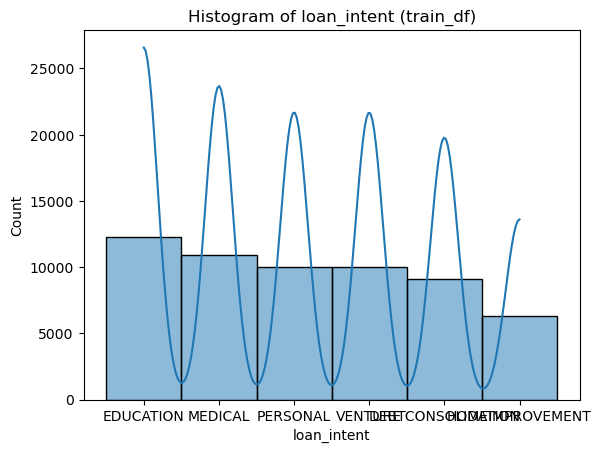

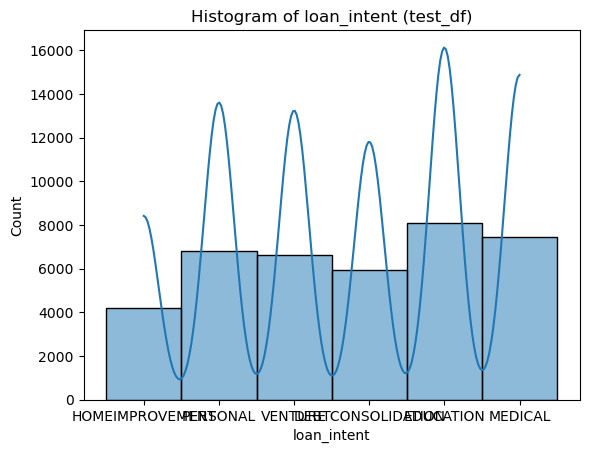

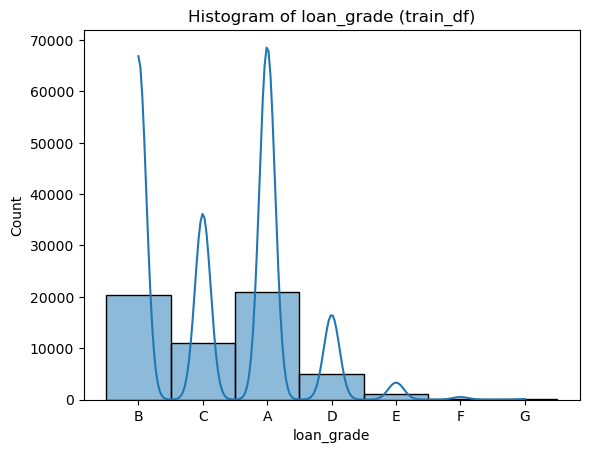

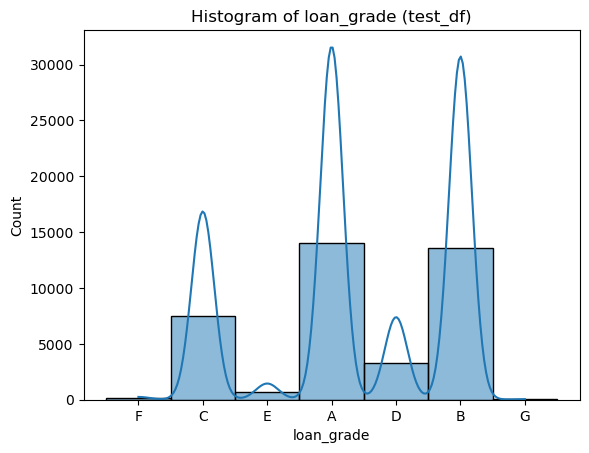

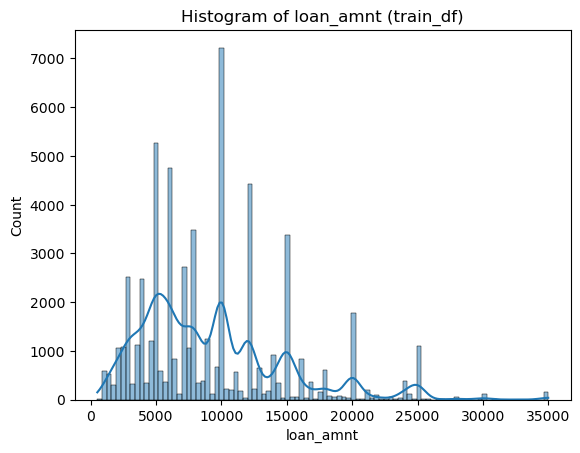

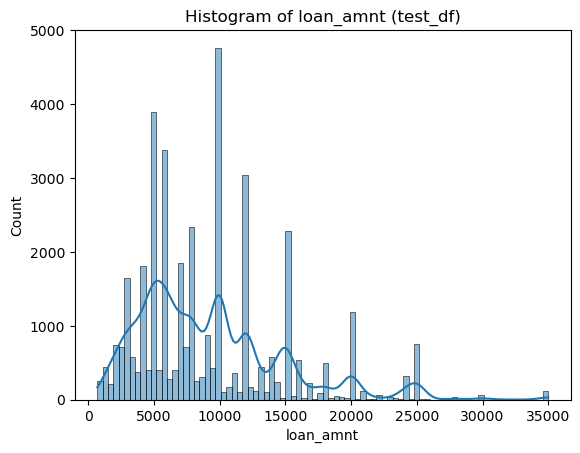

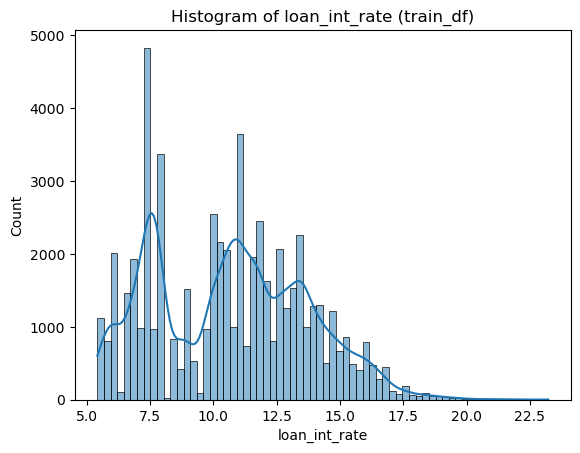

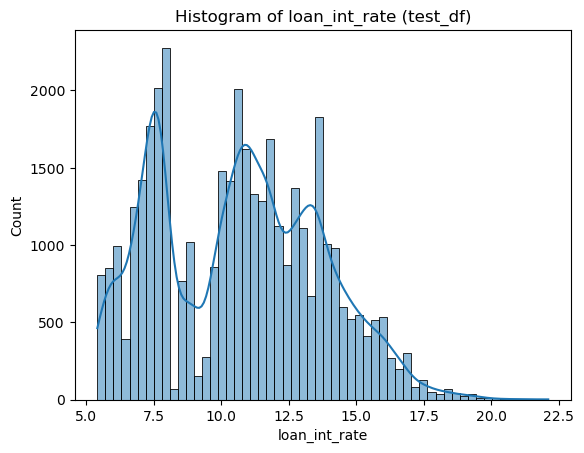

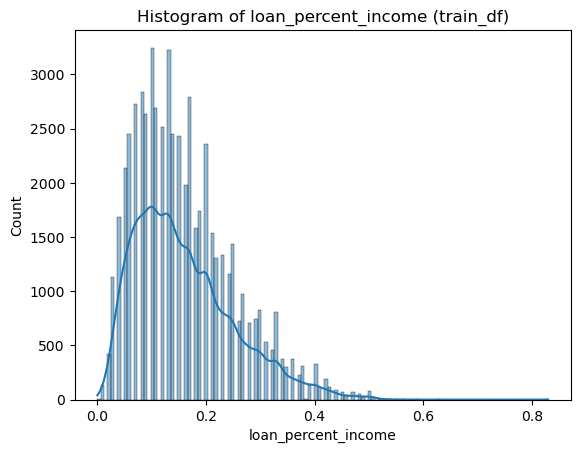

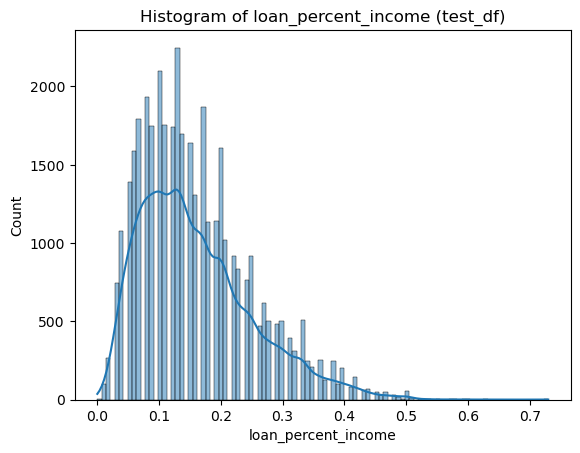

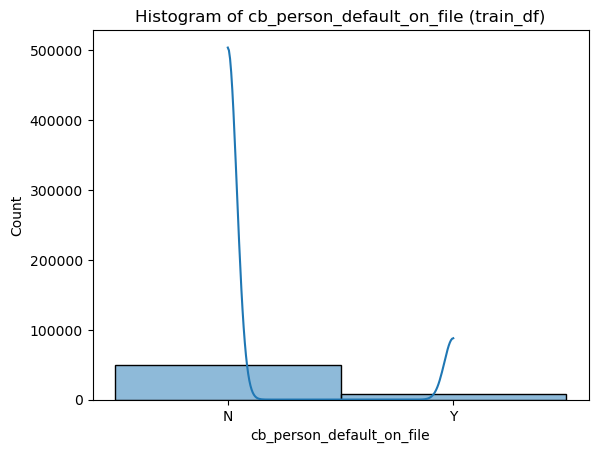

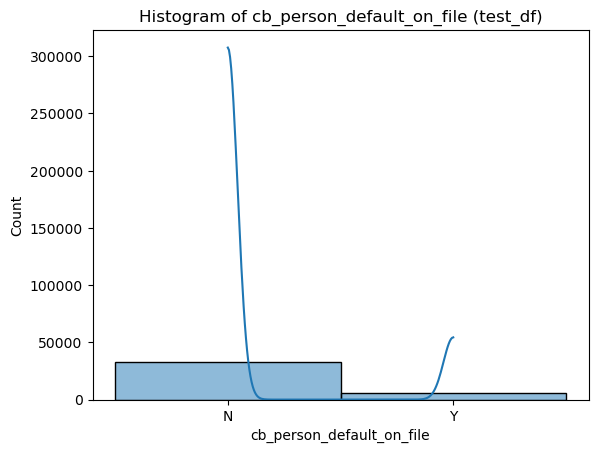

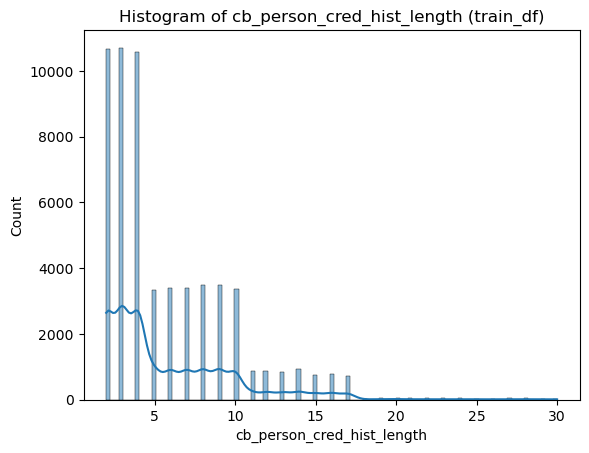

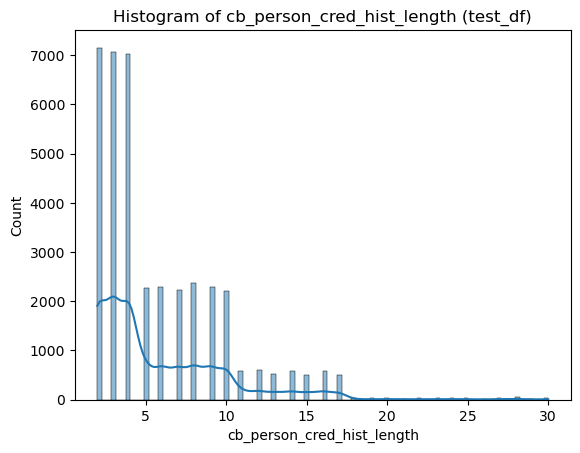

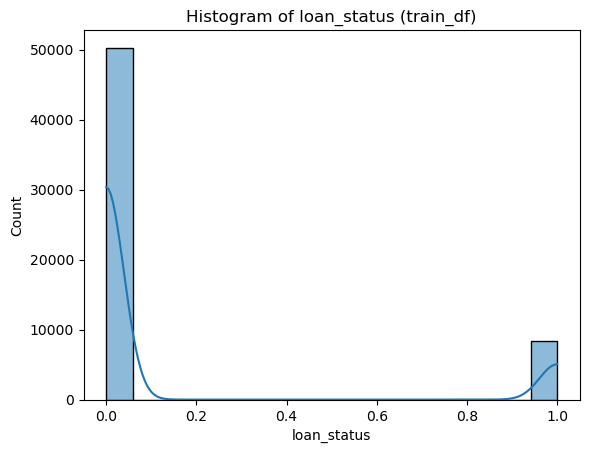

In [78]:
# Функция для построения гистограммы для train_df
def histogram_train(column_name):
    sns.histplot(data=train_df, x=column_name, kde=True)
    plt.title(f'Histogram of {column_name} (train_df)')
    plt.show()

# Функция для построения гистограммы для test_df
def histogram_test(column_name):
    sns.histplot(data=test_df, x=column_name, kde=True)
    plt.title(f'Histogram of {column_name} (test_df)')
    plt.show()

# Список столбцов, кроме 'id'
columns_to_plot = [col for col in train_df.columns if col != 'id']

# Проход по каждому столбцу и построение гистограмм
for column in columns_to_plot:
    if column == 'loan_status':
        histogram_train(column)
    else:
        histogram_train(column)
        histogram_test(column)

# SCATTERPLOT

<Axes: xlabel='cb_person_cred_hist_length', ylabel='person_emp_length'>

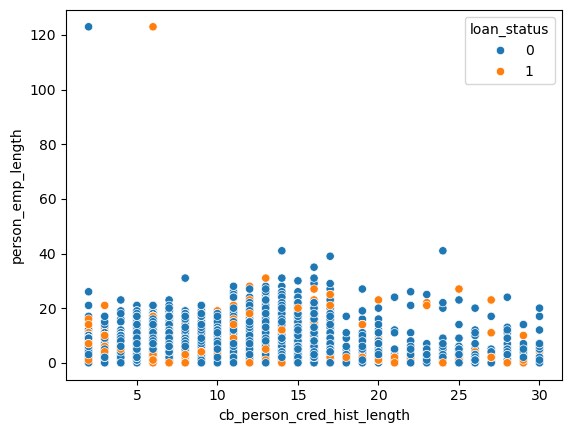

In [79]:
sns.scatterplot(data=train_df,x='cb_person_cred_hist_length',y='person_emp_length',hue='loan_status')

In [80]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

<Axes: xlabel='loan_int_rate', ylabel='loan_percent_income'>

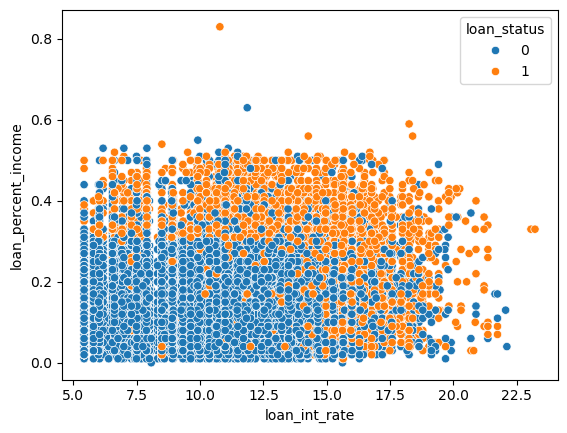

In [81]:
sns.scatterplot(data=train_df, x='loan_int_rate', y='loan_percent_income', hue='loan_status')

<Axes: xlabel='loan_int_rate', ylabel='loan_amnt'>

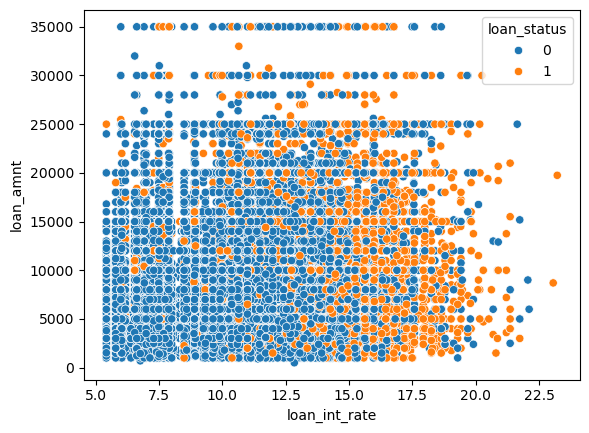

In [82]:
sns.scatterplot(data=train_df, x='loan_int_rate', y='loan_amnt', hue='loan_status')

# Outliers

In [83]:
# Шаг 1: Выбор числовых столбцов
numeric_df = train_df.select_dtypes(include=[np.number])

# Шаг 2: Вычисление Z-оценок числовых данных
z_scores = np.abs(stats.zscore(numeric_df))

# Шаг 3: Установка порога для определения выбросов
threshold = 10

# Шаг 4: Создание маски для определения строк без выбросов
non_outlier_mask = (z_scores < threshold).all(axis=1)

# Шаг 5: Фильтрация исходного DataFrame для удаления выбросов
filtered_train_df = train_df[non_outlier_mask]

In [84]:
non_outlier_mask.shape

(58645,)

In [85]:
train_df.shape

(58645, 13)

In [86]:
filtered_train_df.shape

(58600, 13)

In [87]:
filtered_train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [88]:
filtered_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58600.0,29322.040836,16929.765209,0.00,14660.75,29323.50,43982.25,58644.00
person_age,58600.0,27.546621,6.019492,20.00,23.00,26.00,30.00,84.00
person_income,58600.0,63538.994437,31464.502485,4200.00,42000.00,58000.00,75500.00,410000.00
person_emp_length,58600.0,4.695410,3.898008,0.00,2.00,4.00,7.00,41.00
loan_amnt,58600.0,9216.462491,5562.778281,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58600.0,10.678320,3.035007,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58600.0,0.159328,0.091654,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58600.0,5.812782,4.028993,2.00,3.00,4.00,8.00,30.00
loan_status,58600.0,0.142474,0.349539,0.00,0.00,0.00,0.00,1.00


# Feature engineering

In [89]:
filtered_train_df = train_df.drop(columns='id')

test_df_using=test_df.drop(columns='id')

In [90]:
filtered_train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [91]:
# отношение суммы кредита (loan_amnt) к доходу заемщика (person_income)
test_df_using['loan_to_income_ratio'] = test_df_using['loan_amnt'] / test_df_using['person_income']

filtered_train_df['loan_to_income_ratio'] = filtered_train_df['loan_amnt'] / filtered_train_df['person_income']

In [92]:
print(filtered_train_df.shape)
print(test_df_using.shape)

(58645, 13)
(39098, 12)


In [93]:
filtered_train_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_to_income_ratio'],
      dtype='object')

# Categorical columns EDA

<Axes: xlabel='loan_grade', ylabel='count'>

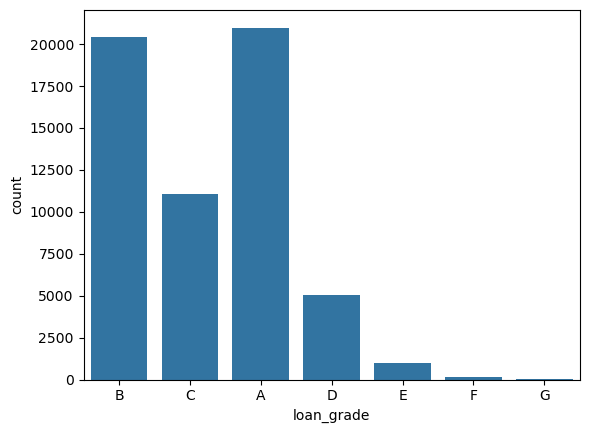

In [94]:
sns.countplot(data=train_df,x='loan_grade')

<Axes: xlabel='loan_grade', ylabel='loan_amnt'>

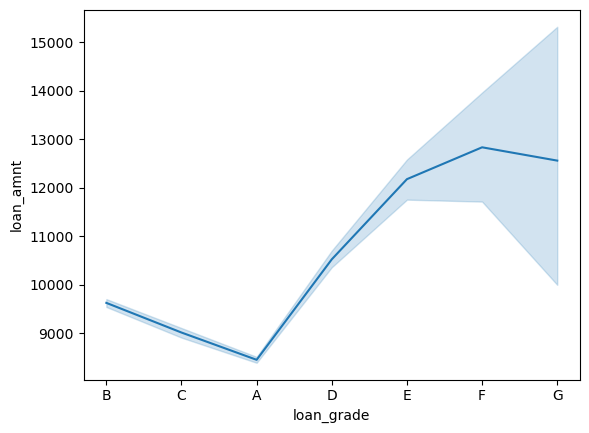

In [95]:
sns.lineplot(data=train_df,x='loan_grade',y='loan_amnt')

In [96]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

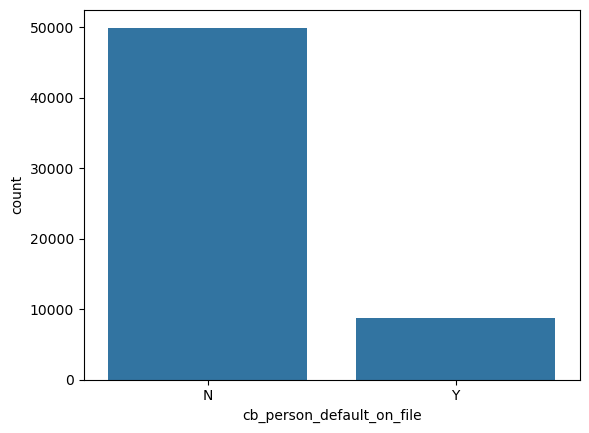

In [97]:
sns.countplot(data=train_df,x='cb_person_default_on_file')

<Axes: xlabel='person_home_ownership', ylabel='count'>

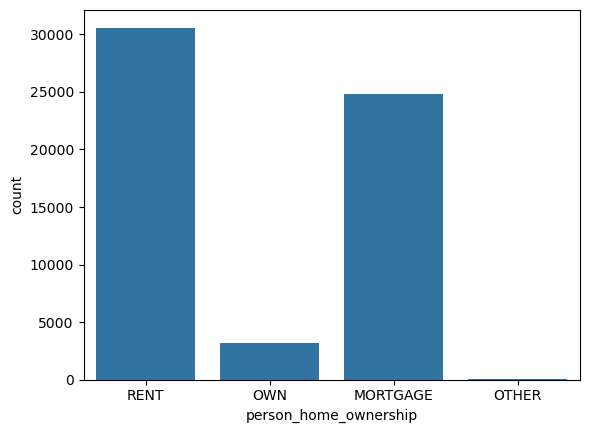

In [98]:
sns.countplot(data=train_df,x='person_home_ownership')

<Axes: xlabel='loan_intent', ylabel='count'>

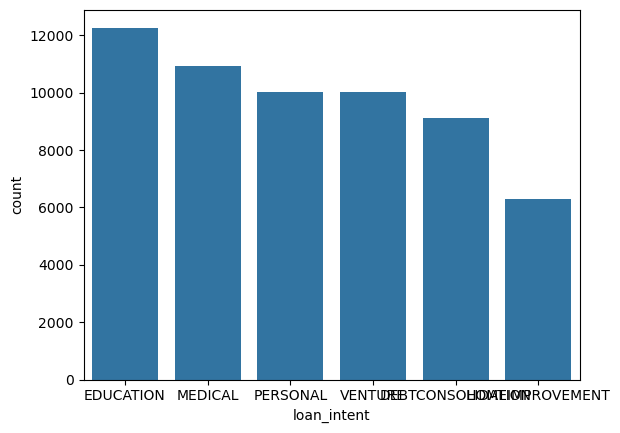

In [99]:
sns.countplot(data=train_df,x='loan_intent')

# Correlation matrix

In [100]:
numeric_df = filtered_train_df.select_dtypes(include=[np.number])

# Вычисление корреляционной матрицы
correlation_matrix = numeric_df.corr()

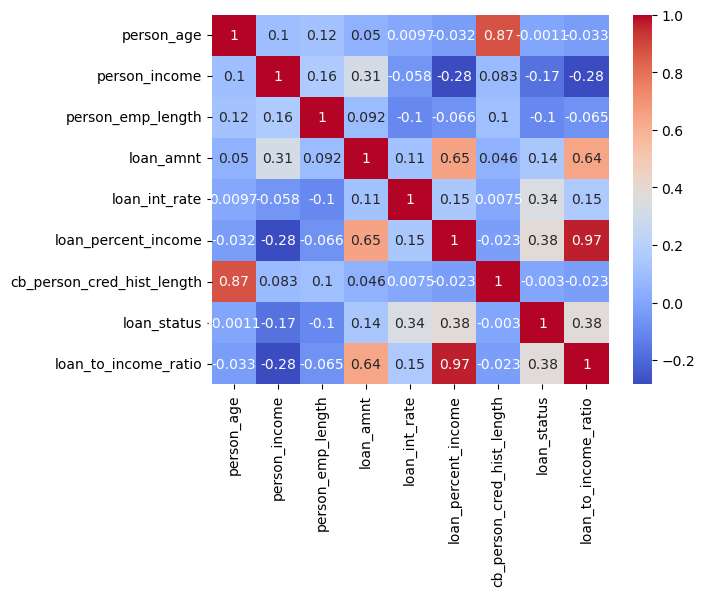

In [101]:
# Отображение тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Encoding of columns

In [102]:
# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Обучение и преобразование целевого столбца
filtered_train_df['loan_status'] = label_encoder.fit_transform(filtered_train_df['loan_status'])

In [103]:
ode_cols = ['loan_grade']
ohe_cols = [ 'loan_intent','cb_person_default_on_file','person_home_ownership']
num_cols = filtered_train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('loan_status')



In [104]:
#ode_cols = ['loan_grade','employment_stability','person_home_ownership','employment_stability','age_group','income_bracket']
#ohe_cols = [ 'loan_intent','cb_person_default_on_file']
#num_cols = filtered_train_df.select_dtypes(include=['int64', 'float64']).columns
#num_cols = num_cols.drop('loan_status')




# Creating Pipelines

In [105]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [106]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols)
    
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [107]:
# Удаление целевого столбца 'loan_status' из датафрейма
X = filtered_train_df.drop('loan_status', axis=1)

# Выделение целевого столбца 'loan_status'
y = filtered_train_df['loan_status']

# Преобразование признаков с использованием ColumnTransformer
X_preprocessed = col_trans.fit_transform(X)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

# Model Training

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()



param_grid_knn = {
    'n_neighbors': [200, 300, 500, 100],  # Количество соседей

    'leaf_size': [10],  # Размер листа для древовидных алгоритмов

    'weights': ['distance']  # Веса для расстояния
    
}



knn_cv = GridSearchCV(knn, param_grid_knn, cv=2, scoring='roc_auc', n_jobs=-1)



knn_cv.fit(X_train, y_train)



best_params = knn_cv.best_params_

print(best_params)

print(knn_cv.best_score_)


In [108]:
knn_final = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 100,leaf_size=10, weights ='distance')
knn_final.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=100, weights='distance')

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


svc = SVC(random_state=13, probability=False)

param_grid_svc = {
    'kernel': ['rbf', 'sigmoid'],  # Использовать только указанные ядра

    'C': [0.1, 1, 10, 100],  # Параметр регуляризации

    'max_iter': [100, 200, 300, -1],  # Максимальное количество итераций, -1 для отсутствия ограничения

    'class_weight': [None, 'balanced'],  # Веса классов
    
}


svc_cv = GridSearchCV(svc, param_grid_svc, cv=2, scoring='roc_auc', n_jobs=-1)


svc_cv.fit(X_train, y_train)


best_params = svc_cv.best_params_

print(best_params)

print(svc_cv.best_score_)


In [109]:
svc_final = SVC( kernel='rbf',class_weight='balanced',max_iter=-1,C=1, random_state=42,probability=True )
svc_final.fit(X_train, y_train)

SVC(C=1, class_weight='balanced', probability=True, random_state=42)

dt = DecisionTreeClassifier()

param_grid_dt = {
    
    'max_depth': [7],
    
    'min_samples_split': [100,200,50]
}

dt_cv = GridSearchCV(dt, param_grid_dt, cv=2, scoring='roc_auc', n_jobs=-1)

dt_cv.fit(X_train, y_train)

print("Best params for Decision Tree:", dt_cv.best_params_)

print("Decision Tree - Best Score:", dt_cv.best_score_)

In [110]:
dt_final = DecisionTreeClassifier(max_depth=7, min_samples_split=100 ,random_state=42)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=100, random_state=42)

rf = RandomForestClassifier()

param_grid_rf = {
   
    'n_estimators': [500],
    
    'max_depth': [15,20,30],
    
    'min_samples_split': [15]
}

rf_cv = GridSearchCV(rf, param_grid_rf, cv=2, scoring='roc_auc', n_jobs=-1)

rf_cv.fit(X_train, y_train)

print("Random Forest - Best Score:", rf_cv.best_score_)

print("Random Forest - Best Params:", rf_cv.best_params_)

In [111]:
rf_final = RandomForestClassifier(max_depth=15, min_samples_split=15,n_estimators=500,random_state=42 )
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=500,
                       random_state=42)


gb = GradientBoostingClassifier()

param_grid_gb = {
   
    'n_estimators': [700,1200],
  
    'learning_rate': [0.01],
 
    'max_depth': [5,10]
}

gb_cv = GridSearchCV(gb, param_grid_gb, cv=2, scoring='roc_auc', n_jobs=-1)

gb_cv.fit(X_train, y_train)

print("Gradient Boosting - Best Score:", gb_cv.best_score_)

print("Gradient Boosting - Best Params:", gb_cv.best_params_)

In [112]:
gb_final=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=1200,random_state=42)
gb_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=1200,
                           random_state=42)


ab = AdaBoostClassifier()

param_grid_ab = {
    'n_estimators': [500,1000],
    'learning_rate': [ 1.0]
}

ab_cv = GridSearchCV(ab, param_grid_ab, cv=2, scoring='roc_auc', n_jobs=-1)

ab_cv.fit(X_train, y_train)

print("AdaBoost - roc_auc Best Score:", ab_cv.best_score_)

print("AdaBoost - Best Params:", ab_cv.best_params_)

In [113]:
ab_final=AdaBoostClassifier(learning_rate=1,n_estimators=1000, random_state=42)
ab_final.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=1000, random_state=42)


xgb = XGBClassifier()

param_grid_xgb = {
    'n_estimators': [1000,700],
    'max_depth': [ 7,12],
    'learning_rate': [0.01,0.001]
}

xgb_cv = GridSearchCV(xgb, param_grid_xgb, cv=2, scoring='roc_auc', n_jobs=-1)

xgb_cv.fit(X_train, y_train)

print("XGBoost - Best Score:", xgb_cv.best_score_)

print("XGBoost - Best Params:", xgb_cv.best_params_)

In [114]:
xgb_final=XGBClassifier(learning_rate=0.01,max_depth=7,n_estimators=1000,random_state=42 )
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


lgb = LGBMClassifier()

param_grid_lgb = {
    'n_estimators': [50, 10],
    'max_depth': [12, 7],
    'learning_rate': [ 0.1],
    'verbosity': [-1]
}

lgb_cv = GridSearchCV(lgb, param_grid_lgb, cv=2, scoring='roc_auc', n_jobs=-1)

lgb_cv.fit(X_train, y_train)

print("LightGBM - Best Score:", lgb_cv.best_score_)

print("LightGBM - Best Params:", lgb_cv.best_params_)


In [115]:
lgb_final=LGBMClassifier(n_estimators=100,max_depth=12, learning_rate= 0.1,verbosity=-1,random_state=42)
lgb_final.fit(X_train, y_train)

LGBMClassifier(max_depth=12, random_state=42, verbosity=-1)


catboost = CatBoostClassifier(verbose=False)

param_grid_cat = {
    'iterations': [500],
    'depth': [5],
    'learning_rate': [ 0.1]
}

cat_cv = GridSearchCV(catboost, param_grid_cat, cv=2, scoring='roc_auc', n_jobs=-1)

cat_cv.fit(X_train, y_train)

print("CatBoost - Best Score:", cat_cv.best_score_)

print("CatBoost - Best Params:", cat_cv.best_params_)

In [116]:
cat_final=CatBoostClassifier(depth= 5,iterations= 500, learning_rate= 0.1,random_state=42,verbose=0)
cat_final.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV



param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],   
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-5, 1e-6]
}


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(best_params)


In [117]:
lr_final=LogisticRegression(max_iter=200,C=0.01)
lr_final.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

# ROC AUC for every model

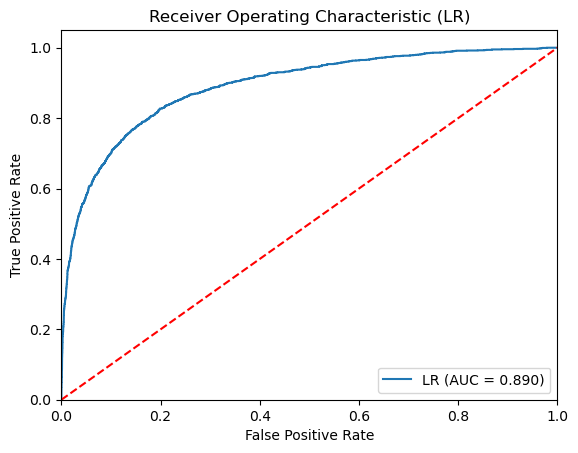

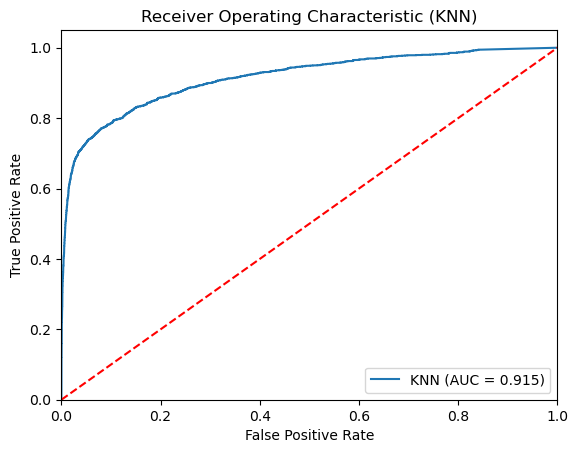

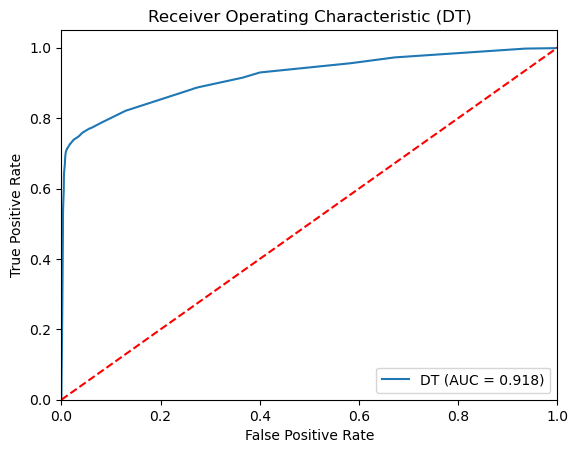

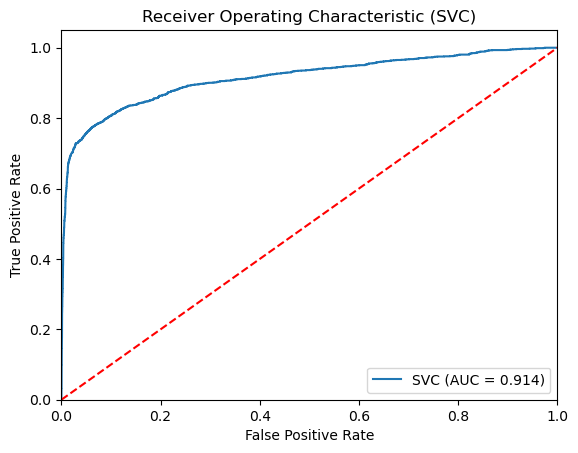

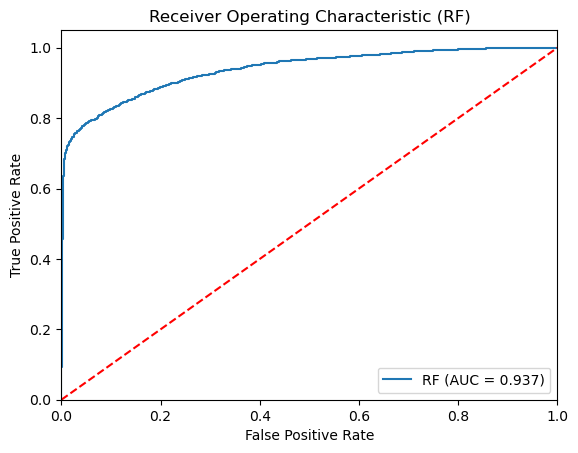

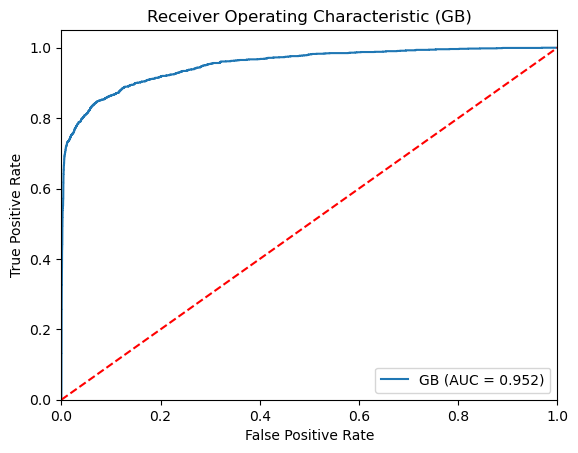

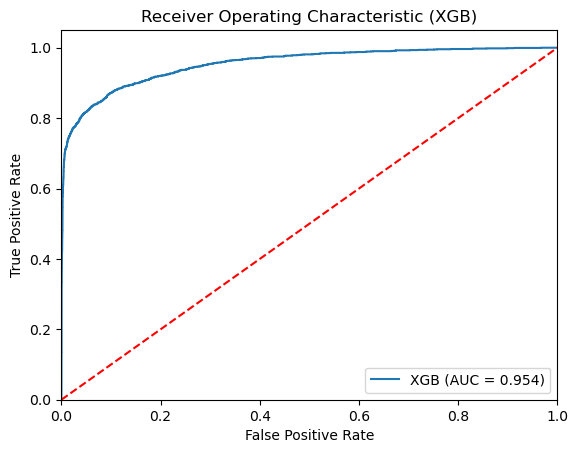

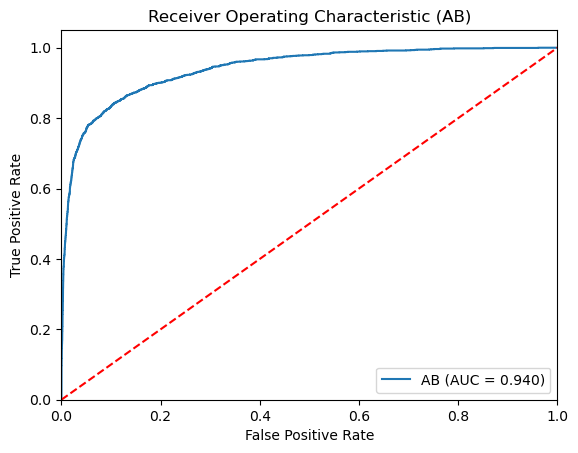

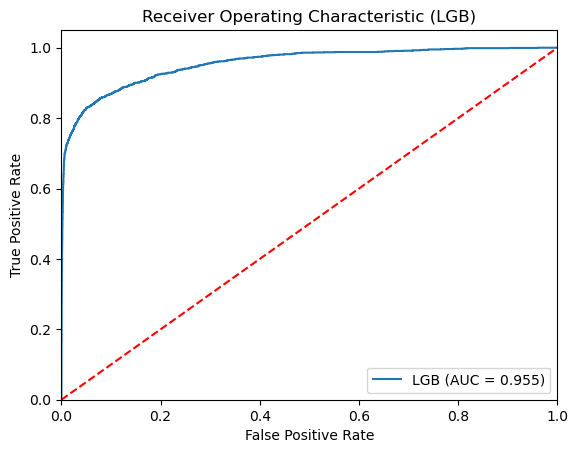

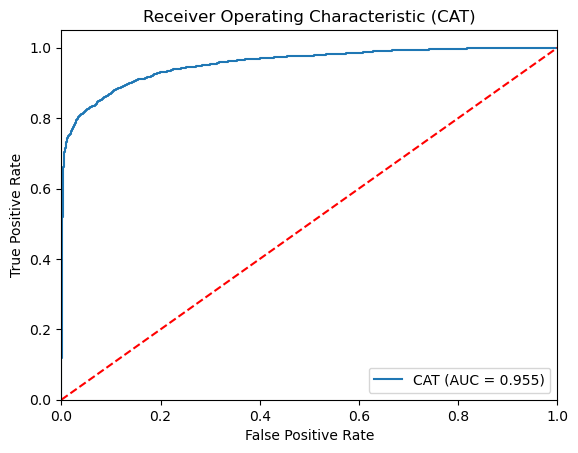

  Model  ROC AUC (Test)
0    LR           0.890
1   KNN           0.915
2    DT           0.918
3   SVC           0.914
4    RF           0.937
5    GB           0.952
6   XGB           0.954
7    AB           0.940
8   LGB           0.955
9   CAT           0.955


In [118]:
# Список моделей
models = [
    ('LR', lr_final),
    ('KNN', knn_final),
    ('DT', dt_final),
    ('SVC', svc_final),
    ('RF', rf_final),
    ('GB', gb_final),
    ('XGB', xgb_final),
    ('AB', ab_final),
    ('LGB', lgb_final),
    ('CAT', cat_final)
]

# Создание списка для хранения результатов
results_list = []

# Цикл для обучения каждой модели и вычисления ROC AUC
for name, model in models:
    # Предсказание вероятностей для тестовых данных
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Вычисление ROC-кривой и AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Округление ROC AUC до трех знаков после запятой
    roc_auc_rounded = round(roc_auc, 3)
    
    # Добавление результата в список
    results_list.append({'Model': name, 'ROC AUC (Test)': roc_auc_rounded})
    
    # Построение ROC-кривой
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_rounded:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Диагональная линия для случайного угадывания
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({name})')
    plt.legend(loc='lower right')
    plt.show()

# Создание DataFrame из списка результатов
results_df = pd.DataFrame(results_list)

# Вывод DataFrame с результатами
print(results_df)

# Voting and Stacking

In [119]:
cat_final=CatBoostClassifier(depth= 5,iterations= 500, learning_rate= 0.1,random_state=42,verbose=0)
cat_final.fit(X_train, y_train)

lr_final=LogisticRegression(max_iter=200,C=0.01)
lr_final.fit(X_train, y_train)

lgb_final=LGBMClassifier(n_estimators=100,max_depth=12, learning_rate= 0.1,verbosity=-1,random_state=42)
lgb_final.fit(X_train, y_train)
ab_final=AdaBoostClassifier(learning_rate=1,n_estimators=1000, random_state=42)
ab_final.fit(X_train, y_train)

xgb_final=XGBClassifier(learning_rate=0.01,max_depth=7,n_estimators=1000,random_state=42 )
xgb_final.fit(X_train, y_train)
gb_final=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=1200,random_state=42)
gb_final.fit(X_train, y_train)
rf_final = RandomForestClassifier(max_depth=15, min_samples_split=15,n_estimators=500,random_state=42 )
rf_final.fit(X_train, y_train)
svc_final = SVC( kernel='rbf',class_weight='balanced',max_iter=-1,C=1, random_state=42,probability=True )
svc_final.fit(X_train, y_train)
dt_final = DecisionTreeClassifier(max_depth=7, min_samples_split=100 ,random_state=42)
dt_final.fit(X_train, y_train)
knn_final = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 100,leaf_size=10, weights ='distance')
knn_final.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=100, weights='distance')

In [120]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[
        ('rf', rf_final),
        ('xgb', xgb_final),
        ('lgb', lgb_final),
        ('cat', cat_final),
        ('gb', gb_final),
        ('ab',ab_final),
        ('knn', knn_final),
        ('dt',dt_final),
        ('svm',svc_final)
    ],voting='soft',
    weights=[2, 4, 7, 4,4,2,1,1,1 ],n_jobs=-1
)

vc.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     min_samples_split=15,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_ty...
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=1000,
                                                 random_state=42)),
                             ('knn',
                              KNeighborsClassifier(leaf_size=10,
                                                   n_neighbors=100,
                                                   weights='distance')),
                             ('dt',
                              DecisionTreeClassifier(max_depth=7,
                                                     min_samples_split=100,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, class_weight='balanced',
                                  probability=True, random_state=42))],
                 n_jobs=-1, voting='soft', weights=[2, 4, 7, 4, 4, 2, 1, 1, 1])

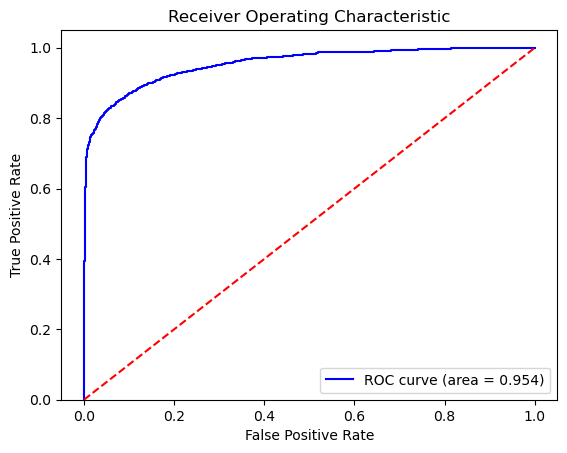

               Model  ROC AUC (Test)
0                 LR           0.890
1                KNN           0.915
2                 DT           0.918
3                SVC           0.914
4                 RF           0.937
5                 GB           0.952
6                XGB           0.954
7                 AB           0.940
8                LGB           0.955
9                CAT           0.955
10  VotingClassifier           0.955


In [121]:
y_prob = vc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

# Создание временного DataFrame
temp_df = pd.DataFrame({'Model': [type(vc).__name__], 'ROC AUC (Test)': [roc_auc_rounded]})

# Объединение с results_df
results_df = pd.concat([results_df, temp_df], ignore_index=True)


plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print(results_df)

In [122]:
# Создание списка моделей
estimators = [
    ('rf', rf_final),  
    ('xgb', xgb_final),  
    ('lgb', lgb_final),  
    ('cat', cat_final),  
    ('gb', gb_final),  
    ('ab', ab_final),  
    ('knn', knn_final),  
    ('dt', dt_final),  
    ('svm', svc_final),  
    ('lr', lr_final)  
]

# Создание модели стекинга с финальной моделью
stackclf = StackingClassifier(
    estimators=estimators,
    final_estimator=vc  # Вы можете выбрать любую классификатор как финальную модель
)

# Обучение модели стекинга
stackclf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=15,
                                                       min_samples_split=15,
                                                       n_estimators=500,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_...
                                                                 AdaBoostClassifier(learning_rate=1,
                                                                                    n_estimators=1000,
                                                                                    random_state=42)),
                                                                ('knn',
                                                                 KNeighborsClassifier(leaf_size=10,
                                                                                      n_neighbors=100,
                                                                                      weights='distance')),
                                                                ('dt',
                                                                 DecisionTreeClassifier(max_depth=7,
                                                                                        min_samples_split=100,
                                                                                        random_state=42)),
                                                                ('svm',
                                                                 SVC(C=1,
                                                                     class_weight='balanced',
                                                                     probability=True,
                                                                     random_state=42))],
                                                    n_jobs=-1, voting='soft',
                                                    weights=[2, 4, 7, 4, 4, 2,
                                                             1, 1, 1]))

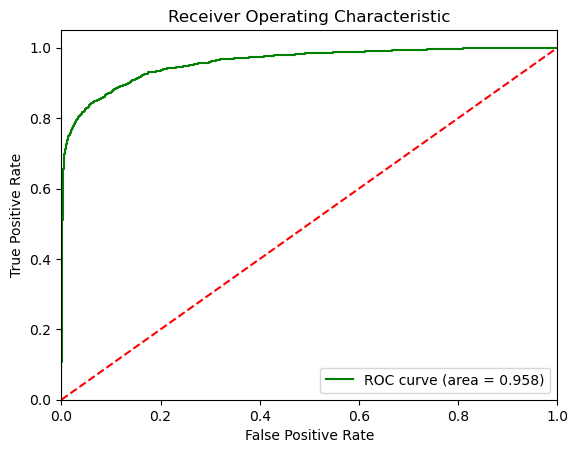

AUC: 0.958


In [123]:
y_prob = stackclf.predict_proba(X_test)[:, 1]

fpr_stack, tpr_stack, thresholds_stack = roc_curve(y_test, y_prob)
roc_auc = auc(fpr_stack, tpr_stack)

# Создание временного DataFrame
temp_df = pd.DataFrame({'Model': [type(stackclf).__name__], 'ROC AUC (Test)': [round(roc_auc, 3)]})

# Объединение с results_df
results_df = pd.concat([results_df, temp_df], ignore_index=True)

plt.figure()
plt.plot(fpr_stack, tpr_stack, color='green', label='ROC curve (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("AUC: {:.3f}".format(roc_auc))

In [124]:
results_df

,Model,ROC AUC (Test)
0,LR,0.890
1,KNN,0.915
2,DT,0.918
3,SVC,0.914
4,RF,0.937
5,GB,0.952
6,XGB,0.954
7,AB,0.940
8,LGB,0.955
9,CAT,0.955
